<a href="https://colab.research.google.com/github/danielrivaldo27/Case-Study-01-Data-Mining---EDA---Ganjil-2022---Kelompok-I-/blob/main/Bekasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Jumlah kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2022-09-23 06:19:16--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.007s  

2022-09-23 06:19:16 (9.31 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2022-09-23 06:19:16--  https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43191

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
dfX.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfX.drop(dfX.iloc[:,14:], axis = 1, inplace = True)

In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.isna().sum()

created_at    885
LT            885
LB            885
KT            885
KM            886
garasi        959
carport       911
lokasi        885
sertifikat    886
listrik       891
hadap         944
harga         885
URL           885
deskripsi     885
dtype: int64

In [ ]:
bekasi = dfX.drop_duplicates()

In [ ]:
bekasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 12.7+ KB


In [ ]:
bekasi.isnull().sum()

created_at     1
LT             1
LB             1
KT             1
KM             2
garasi        75
carport       27
lokasi         1
sertifikat     2
listrik        7
hadap         60
harga          1
URL            1
deskripsi      1
dtype: int64

In [30]:
bekasi['hadap'] = bekasi['hadap'].astype('category')
bekasi['lokasi'] = bekasi['lokasi'].astype('category')
bekasi['sertifikat'] = bekasi['sertifikat'].astype('category')
bekasi['garasi'] = bekasi['lokasi'].astype('string')
bekasi['carport'] = bekasi['sertifikat'].astype('string')
bekasi.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

created_at    datetime64[ns]
LT                   float64
LB                   float64
KT                   float64
KM                   float64
garasi                string
carport               string
lokasi              category
sertifikat          category
listrik              float64
hadap               category
harga                float64
URL                   object
deskripsi             object
dtype: object

In [ ]:
bekasi["created_at"] = pd.to_datetime(bekasi["created_at"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
bekasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  107 non-null    datetime64[ns]
 1   LT          107 non-null    float64       
 2   LB          107 non-null    float64       
 3   KT          107 non-null    float64       
 4   KM          106 non-null    float64       
 5   garasi      107 non-null    category      
 6   carport     106 non-null    category      
 7   lokasi      107 non-null    category      
 8   sertifikat  106 non-null    category      
 9   listrik     101 non-null    float64       
 10  hadap       48 non-null     category      
 11  harga       107 non-null    float64       
 12  URL         107 non-null    object        
 13  deskripsi   107 non-null    object        
dtypes: category(5), datetime64[ns](1), float64(6), object(2)
memory usage: 9.7+ KB


In [ ]:
bekasi.shape

(108, 14)

In [ ]:
bekasi.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,2021-08-12,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,2021-08-12,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,2021-08-12,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,2021-08-12,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,2021-08-12,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...


In [31]:
bekasi.isna().sum()

created_at     1
LT             1
LB             1
KT             1
KM             2
garasi         1
carport        2
lokasi         1
sertifikat     2
listrik        7
hadap         60
harga          1
URL            1
deskripsi      1
dtype: int64

In [32]:
bks = bekasi.fillna(bekasi.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [33]:
bks.isnull().sum()

created_at     1
LT             0
LB             0
KT             0
KM             0
garasi         1
carport        2
lokasi         1
sertifikat     2
listrik        0
hadap         60
harga          0
URL            1
deskripsi      1
dtype: int64

In [34]:
bks[['garasi','carport']] = bks[['garasi','carport']].fillna('0')

In [35]:
bks.isnull().sum()

created_at     1
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         1
sertifikat     2
listrik        0
hadap         60
harga          0
URL            1
deskripsi      1
dtype: int64

In [36]:
bks.describe()

,LT,LB,KT,KM,listrik,harga
count,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02
mean,108.822430,110.635514,2.962617,1.943396,2056.435644,1.074823e+09
std,58.887793,71.419178,1.022415,0.840896,937.327264,7.480947e+08
min,36.000000,30.000000,1.000000,1.000000,900.000000,1.600000e+08
25%,72.000000,60.000000,2.000000,1.000000,1300.000000,5.832500e+08
50%,92.500000,90.000000,3.000000,2.000000,2200.000000,9.200000e+08
75%,128.250000,144.000000,4.000000,2.250000,2200.000000,1.350000e+09
max,364.000000,494.000000,7.000000,4.000000,5500.000000,4.500000e+09


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

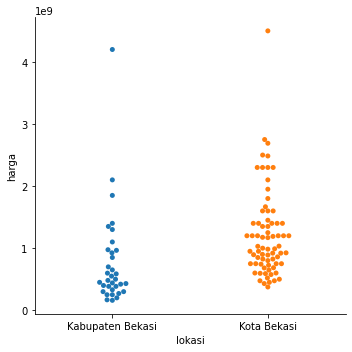

In [43]:
p = sns.catplot(x='lokasi', y='harga', kind='swarm', data=bks)